# ML assignment 3
## Problem 1

In [1]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('Concrete_Data.csv')

# rename columns
df.rename(columns=lambda x: x.split('(')[0], inplace=True)

In [2]:
df.assign().head()

Cement   Blast Furnace Slag   Fly Ash   Water    Superplasticizer   \
0    540.0                  0.0       0.0    162.0                2.5   
1    540.0                  0.0       0.0    162.0                2.5   
2    332.5                142.5       0.0    228.0                0.0   
3    332.5                142.5       0.0    228.0                0.0   
4    198.6                132.4       0.0    192.0                0.0   

   Coarse Aggregate    Fine Aggregate   Age   Concrete compressive strength  
0              1040.0            676.0    28                          79.99  
1              1055.0            676.0    28                          61.89  
2               932.0            594.0   270                          40.27  
3               932.0            594.0   365                          41.05  
4               978.4            825.5   360                          44.30

In [3]:
df.describe(percentiles=[])

Cement   Blast Furnace Slag      Fly Ash       Water    \
count  1030.000000          1030.000000  1030.000000  1030.000000   
mean    281.167864            73.895825    54.188350   181.567282   
std     104.506364            86.279342    63.997004    21.354219   
min     102.000000             0.000000     0.000000   121.800000   
50%     272.900000            22.000000     0.000000   185.000000   
max     540.000000           359.400000   200.100000   247.000000   

       Superplasticizer   Coarse Aggregate    Fine Aggregate          Age   \
count        1030.000000         1030.000000      1030.000000  1030.000000   
mean            6.204660          972.918932       773.580485    45.662136   
std             5.973841           77.753954        80.175980    63.169912   
min             0.000000          801.000000       594.000000     1.000000   
50%             6.400000          968.000000       779.500000    28.000000   
max            32.200000         1145.000000       992.600000   365.000000   

       Concrete compressive strength  
count                    1030.000000  
mean                       35.817961  
std                        16.705742  
min                         2.330000  
50%                        34.445000  
max                        82.600000

In [4]:
df.input=df.iloc[:,0:-1]
df.input.head()

Cement   Blast Furnace Slag   Fly Ash   Water    Superplasticizer   \
0    540.0                  0.0       0.0    162.0                2.5   
1    540.0                  0.0       0.0    162.0                2.5   
2    332.5                142.5       0.0    228.0                0.0   
3    332.5                142.5       0.0    228.0                0.0   
4    198.6                132.4       0.0    192.0                0.0   

   Coarse Aggregate    Fine Aggregate   Age   
0              1040.0            676.0    28  
1              1055.0            676.0    28  
2               932.0            594.0   270  
3               932.0            594.0   365  
4               978.4            825.5   360

In [5]:
df.output=df.iloc[:,-1]
df.output.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Concrete compressive strength, dtype: float64

In [6]:
# Show columns containing missing values
print("Columns containing missing value:", 
      df.columns[df.isna().any()].tolist())

Columns containing missing value: []


## Standardization 

In [7]:
from sklearn.preprocessing import StandardScaler
#df = StandardScaler().fit_transform(df)
#df.assign()

np_scaled = StandardScaler().fit_transform(df)
df = pd.DataFrame(np_scaled, columns=df.columns)
df.head()

Cement   Blast Furnace Slag   Fly Ash    Water    Superplasticizer   \
0  2.477915            -0.856888 -0.847144 -0.916764          -0.620448   
1  2.477915            -0.856888 -0.847144 -0.916764          -0.620448   
2  0.491425             0.795526 -0.847144  2.175461          -1.039143   
3  0.491425             0.795526 -0.847144  2.175461          -1.039143   
4 -0.790459             0.678408 -0.847144  0.488793          -1.039143   

   Coarse Aggregate    Fine Aggregate       Age   \
0            0.863154        -1.217670 -0.279733   
1            1.056164        -1.217670 -0.279733   
2           -0.526517        -2.240917  3.553066   
3           -0.526517        -2.240917  5.057677   
4            0.070527         0.647884  4.978487   

   Concrete compressive strength  
0                       2.645408  
1                       1.561421  
2                       0.266627  
3                       0.313340  
4                       0.507979

### Visualiaztion for 9 attributes

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#g1 = sns.pairplot(df)
#g1.savefig("pairplot.png")

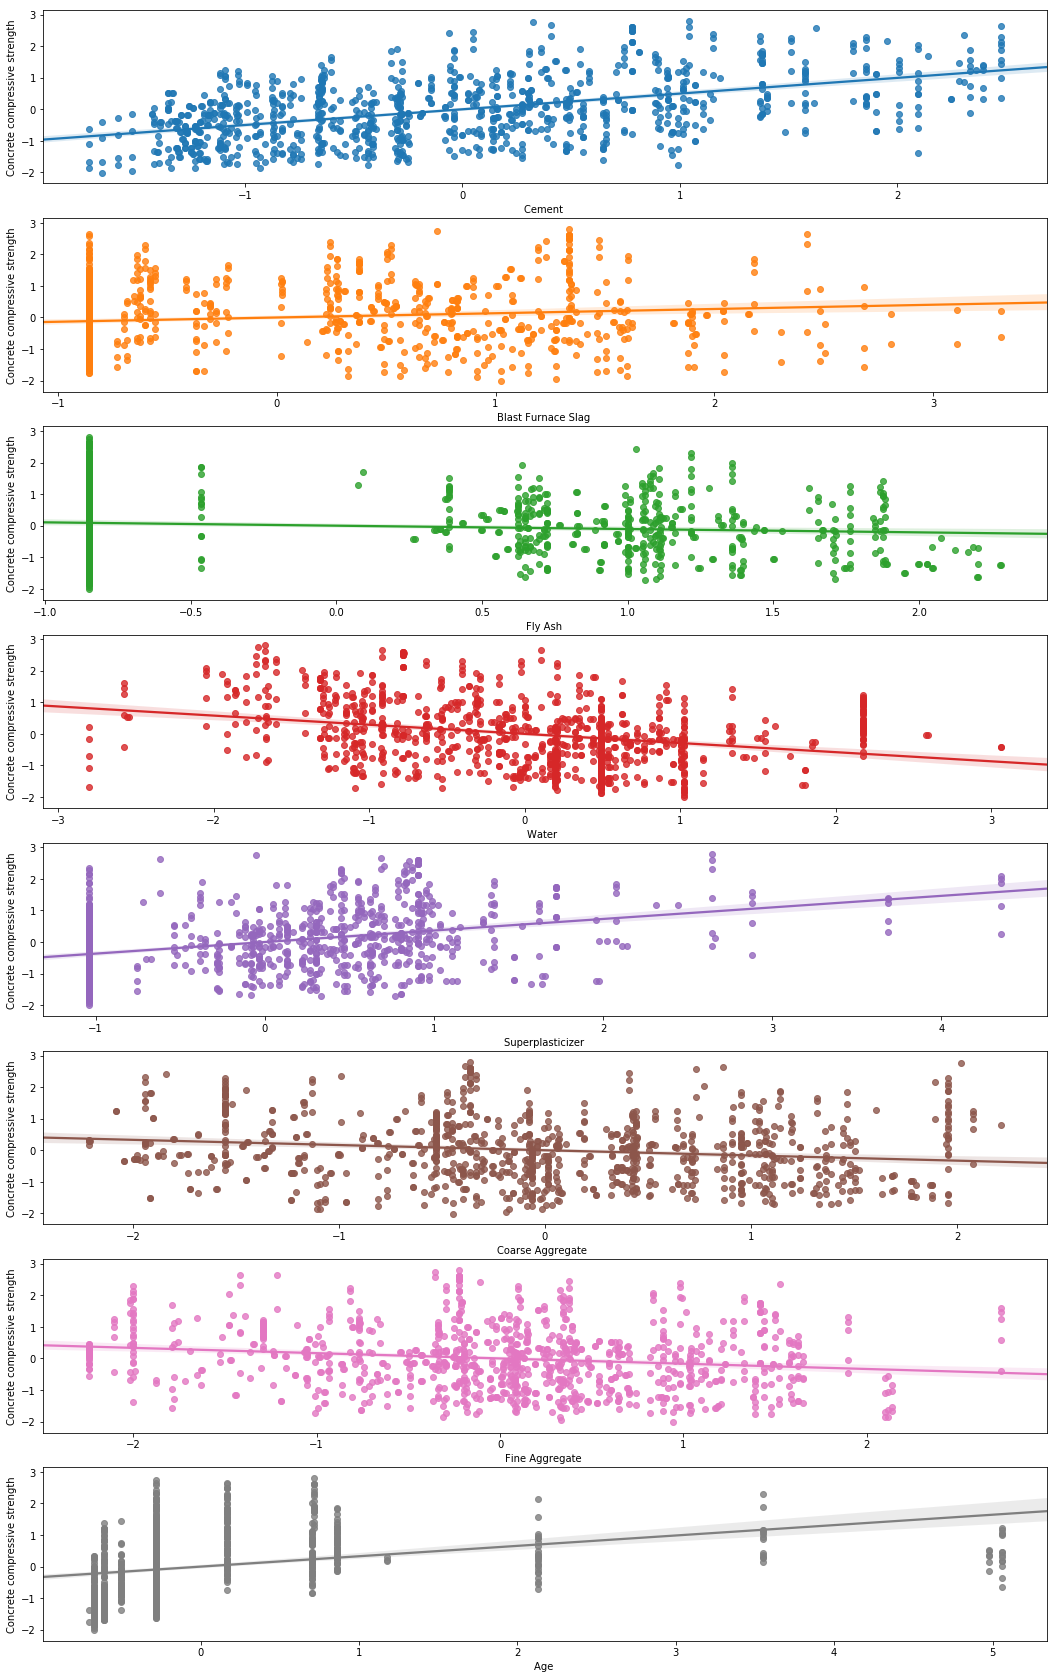

In [10]:
# Create a figure instance, and the two subplots
inputNum = 8

axes = []
fig, axes = plt.subplots(nrows=inputNum, sharey=True, figsize=(18, 30))

for i in range(0, inputNum):
    sns.regplot(x=df.columns[i], y=df.columns[inputNum], data=df, ax=axes[i])

plt.show()

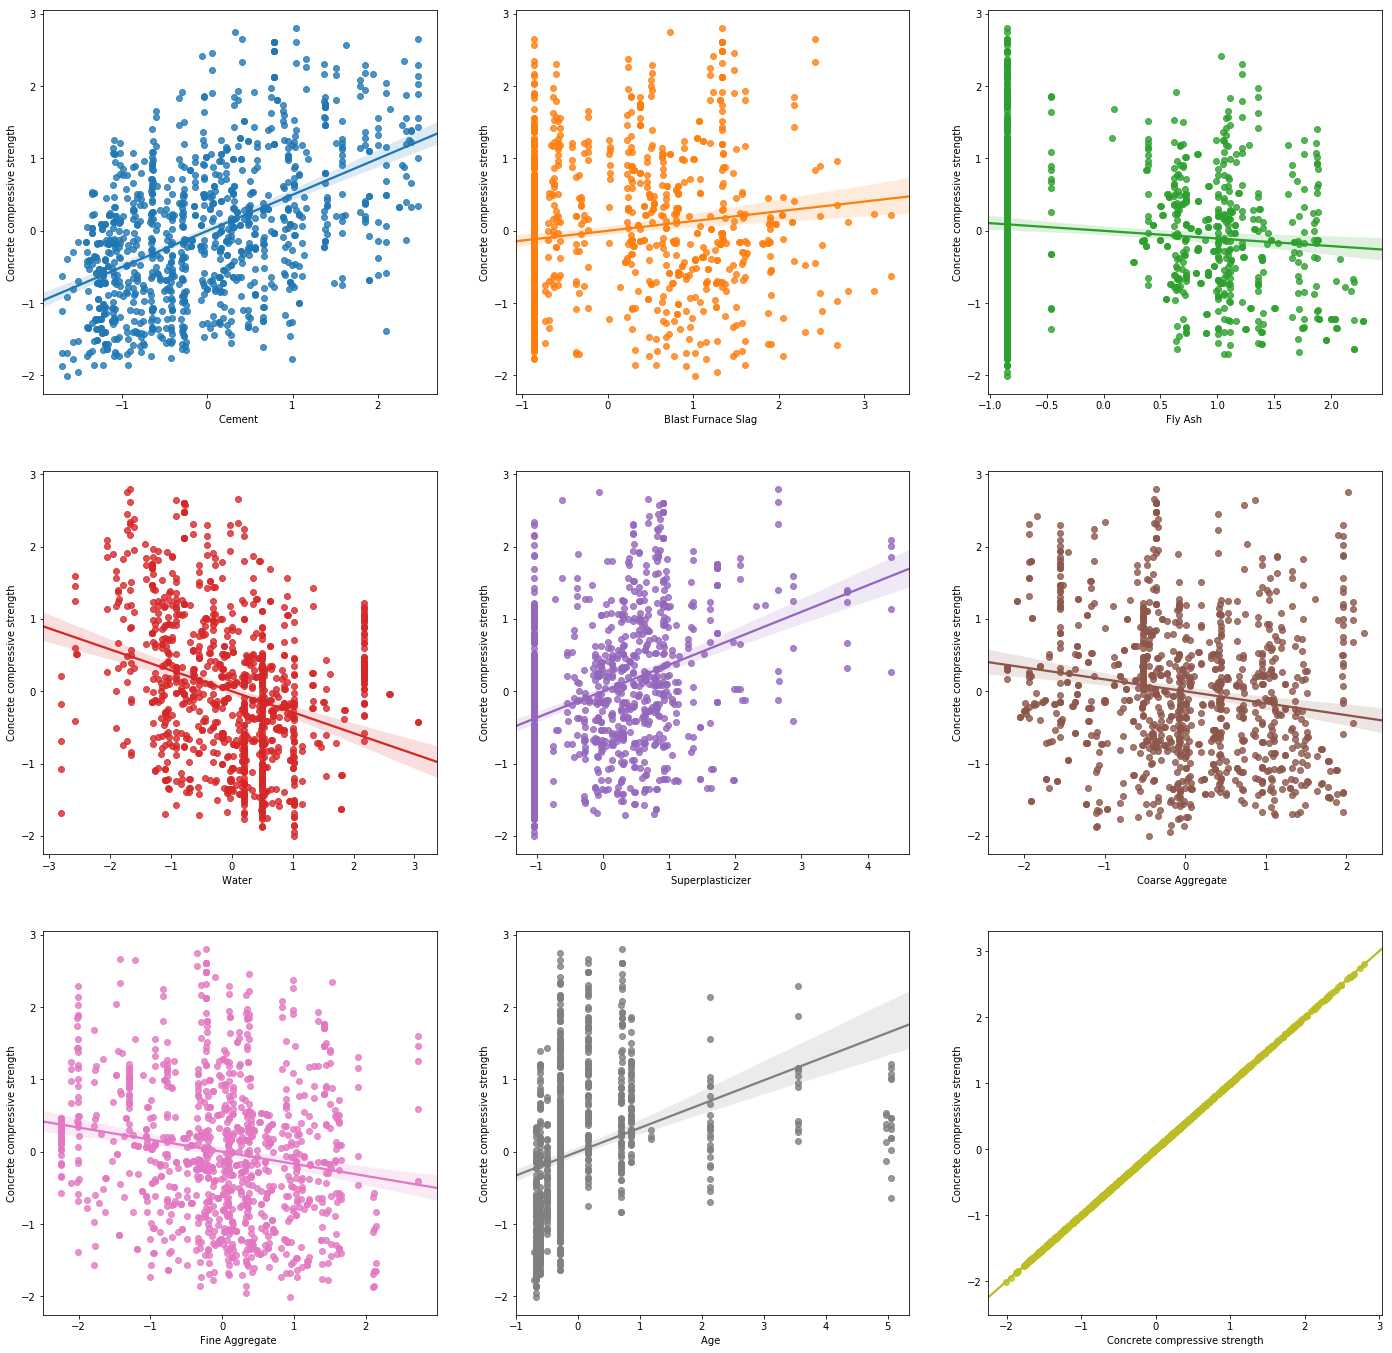

In [11]:
# Create a figure instance, and the two subplots
inputNum = 8

axes = []
fig, axes = plt.subplots(3, 3, figsize=(24, 24))

for i in range(0, 3):
    for j in range(0, 3):
        sns.regplot(x=df.columns[i*3+j], y=df.columns[inputNum], data=df, ax=axes[i][j])

plt.show()

## Data Selection & Data Partition
* For each input attribute
    * 80% data for training
    * 20% data for testing

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
row = ['lm1', 'lm2', 'lm3', 'lm4', 'lm5', 'lm6', 'lm7', 'lm8']
col = ['MSE', 'Cor', 'R2', 'bias', 'weight']
regResult = pd.DataFrame(index=row, columns=col)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

inputNum = 8

X, y = df.iloc[:, 0:inputNum], df.iloc[:, inputNum:inputNum+1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Simple linear regression
* iteratively train linear model with each attribute

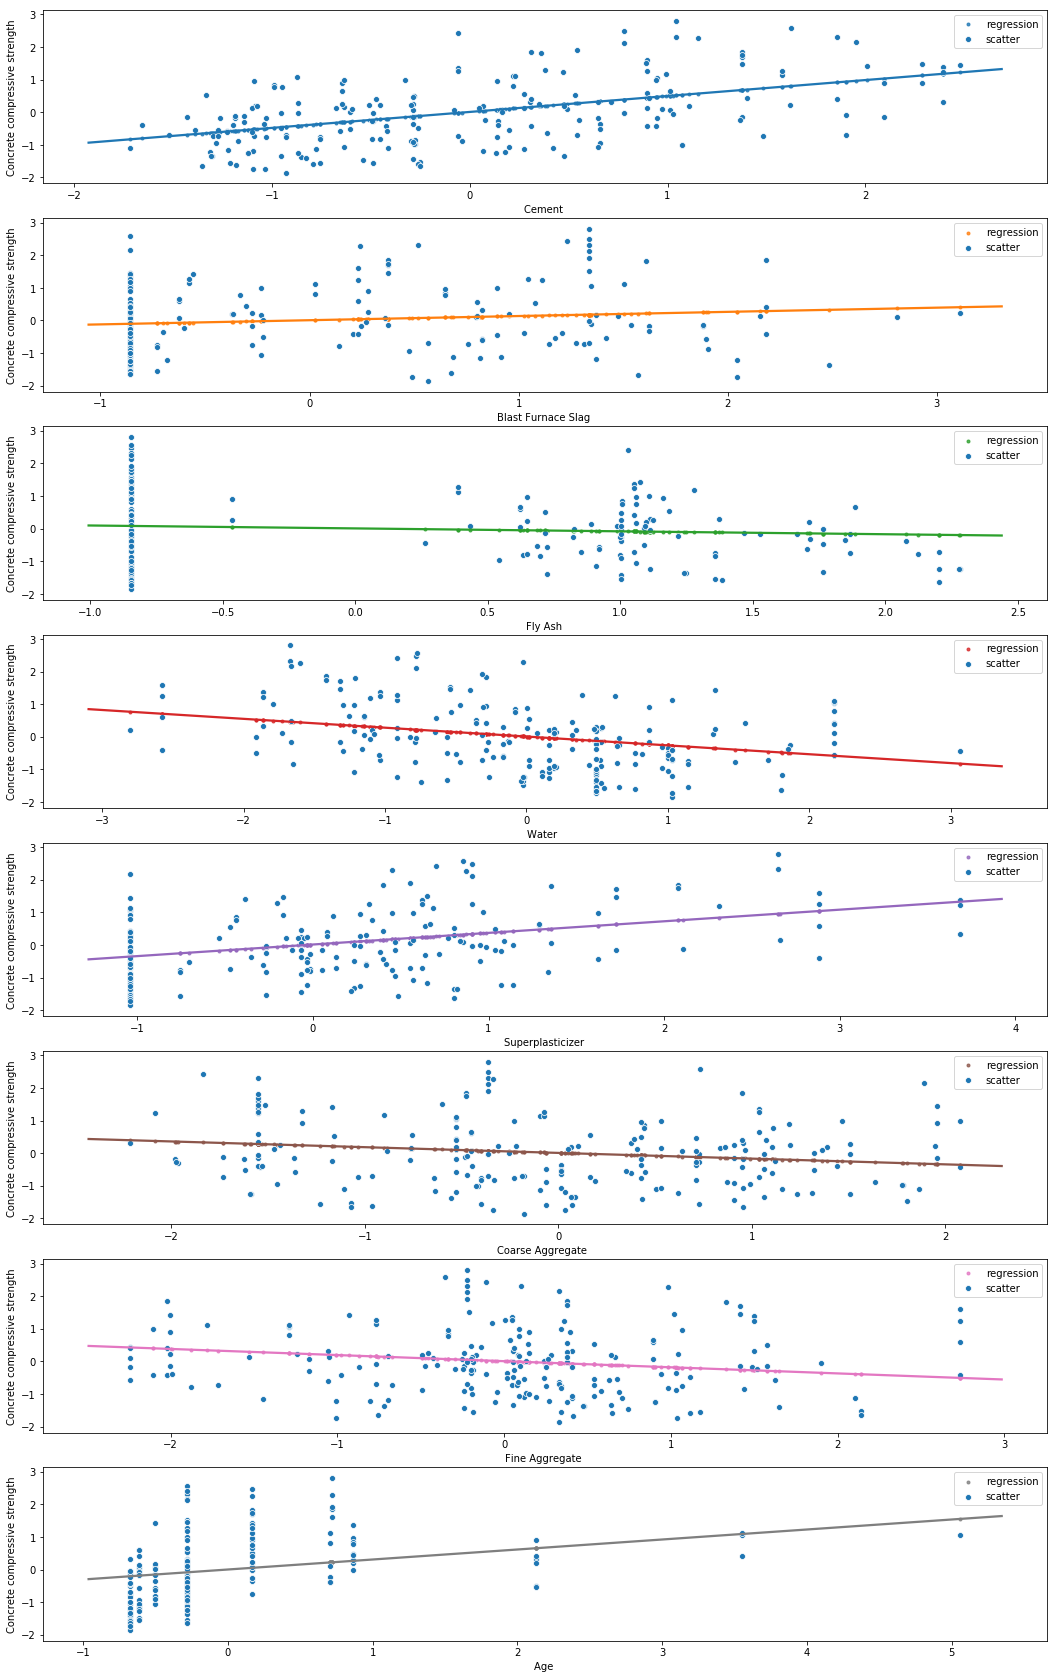

In [14]:
axes = []
fig, axes = plt.subplots(nrows=inputNum, sharey=True, figsize=(18, 30))


for i in range(0, inputNum):
    #sns.regplot(x=df.columns[i], y=df.columns[inputNum], data=df, ax=axes[i])
    
    #df2 = pd.concat([X_train, X_test, y_train, y_test], axis=1)
    Train = pd.concat([X_train, y_train], axis=1)
    Test = pd.concat([X_test, y_test], axis=1)
    
    


    ### simple linear regression by sklearn function

    # Train linear model by training set
    reg1 = LinearRegression().fit(X_train.iloc[:, i:i+1], y_train)
    y_pred_lm = reg1.predict(X_test.iloc[:, i:i+1])
    Test['y_pred_lm'] = y_pred_lm

    # Plot outputs    
    sns.regplot(x=Test.columns[i], y='y_pred_lm', 
                data=Test, ax=axes[i], label='regression', marker='.')
    sns.scatterplot(x=Test.columns[i], y='Concrete compressive strength', 
                    data=Test, ax=axes[i], label='scatter')


    #plt.plot(X_test, y_pred_lm, color='blue', linewidth=3)

    regResult.iloc[i, 0] = mean_squared_error(y_test, y_pred_lm)
    regResult.iloc[i, 1] = reg1.score(X_train.iloc[:, i:i+1], y_train)
    regResult.iloc[i, 2] = r2_score(y_test, y_pred_lm)
    regResult.iloc[i, 3] = reg1.intercept_[0]
    regResult.iloc[i, 4] = reg1.coef_[0]
    regResult.assign()

    #plt.legend()
    #plt.show()


In [15]:
regResult.assign()

MSE         Cor          R2        bias                  weight
lm1   0.76095    0.241511    0.270385  0.00881143   [0.48908507004531826]
lm2   1.01867   0.0164834   0.0232731   0.0065061   [0.12816834041572597]
lm3   1.02085  0.00791413   0.0211892  0.00624392  [-0.08939418590123754]
lm4  0.908742   0.0713487    0.128679    0.008078  [-0.27137926316886857]
lm5  0.857007    0.121736    0.178283   0.0145947   [0.35621797153458684]
lm6   1.02961   0.0305339   0.0127896   0.0081849  [-0.17560925496399488]
lm7   1.04573   0.0352408 -0.00266844  0.00550458   [-0.1876630049284433]
lm8  0.913056    0.102996    0.124542  0.00134052    [0.3067393966701216]

In [16]:
max(regResult['Cor']), max(regResult['R2'])

(0.24151116875319967, 0.2703849703680574)

## Problem2
* Build own gradient descent function
* 現在只用第一個 attribute "Cement" 下去 train，可能要 train 3~5 分鐘

### Refresh Data

In [17]:
df.assign().head()

Cement   Blast Furnace Slag   Fly Ash    Water    Superplasticizer   \
0  2.477915            -0.856888 -0.847144 -0.916764          -0.620448   
1  2.477915            -0.856888 -0.847144 -0.916764          -0.620448   
2  0.491425             0.795526 -0.847144  2.175461          -1.039143   
3  0.491425             0.795526 -0.847144  2.175461          -1.039143   
4 -0.790459             0.678408 -0.847144  0.488793          -1.039143   

   Coarse Aggregate    Fine Aggregate       Age   \
0            0.863154        -1.217670 -0.279733   
1            1.056164        -1.217670 -0.279733   
2           -0.526517        -2.240917  3.553066   
3           -0.526517        -2.240917  5.057677   
4            0.070527         0.647884  4.978487   

   Concrete compressive strength  
0                       2.645408  
1                       1.561421  
2                       0.266627  
3                       0.313340  
4                       0.507979

In [18]:
from sklearn.preprocessing import StandardScaler

np_scaled = StandardScaler().fit_transform(df)
df_normalized = pd.DataFrame(np_scaled, columns=df.columns)
df_normalized.head()

Cement   Blast Furnace Slag   Fly Ash    Water    Superplasticizer   \
0  2.477915            -0.856888 -0.847144 -0.916764          -0.620448   
1  2.477915            -0.856888 -0.847144 -0.916764          -0.620448   
2  0.491425             0.795526 -0.847144  2.175461          -1.039143   
3  0.491425             0.795526 -0.847144  2.175461          -1.039143   
4 -0.790459             0.678408 -0.847144  0.488793          -1.039143   

   Coarse Aggregate    Fine Aggregate       Age   \
0            0.863154        -1.217670 -0.279733   
1            1.056164        -1.217670 -0.279733   
2           -0.526517        -2.240917  3.553066   
3           -0.526517        -2.240917  5.057677   
4            0.070527         0.647884  4.978487   

   Concrete compressive strength  
0                       2.645408  
1                       1.561421  
2                       0.266627  
3                       0.313340  
4                       0.507979

In [19]:
#X, y = df.iloc[:, 0:-1], df.iloc[:, -1]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
Train = pd.concat([X_train, y_train], axis=1)
Test = pd.concat([X_test, y_test], axis=1)

In [20]:
X_train.head()

Cement   Blast Furnace Slag   Fly Ash    Water    Superplasticizer   \
854  0.055834             0.546215  0.622388  0.301385           0.468157   
3    0.491425             0.795526 -0.847144  2.175461          -1.039143   
750  2.094977            -0.856888 -0.847144  0.863608          -1.039143   
30   0.218582             0.024400 -0.847144  2.175461          -1.039143   
956 -1.265302             0.506789  0.586432  0.062440           0.149950   

     Coarse Aggregate    Fine Aggregate       Age   
854           -0.886803        -0.968098 -0.279733  
3             -0.526517        -2.240917  5.057677  
750            1.956877        -2.003823 -0.279733  
30            -0.526517        -1.292542  5.057677  
956           -0.251157         0.083850 -0.279733

### Gradient Descent 

In [25]:
# Gradient Descent 
def descent(X, y, b_current, m_current, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(X.shape[0])
    for i in range(0, X.shape[0]):
        b_gradient += -(2/N) * (y.iloc[i][0] - ((m_current * X.iloc[i][0]) + b_current))
        m_gradient += -(2/N) * X.iloc[i][0] * (y.iloc[i][0] - ((m_current * X.iloc[i][0]) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return new_b, new_m, learning_rate * b_gradient, learning_rate * m_gradient
    #return float(new_b), float(new_m), float(learning_rate * b_gradient), float(learning_rate * m_gradient)

def gd(X, y, starting_b=0, starting_m=0, learning_rate=0.01, epochs=2000):
    b = starting_b
    m = starting_m
    step1 = 0
    step2 = 0
    stopThreshold = 0.000001
    for i in range(epochs):
        b, m, step1, step2 = descent(X, y, b, m, learning_rate)
        #print(b, m, step1, step2)
        if abs(step1) < stopThreshold or abs(step2) < stopThreshold:
            print(b, m, step1, step2)
            print("epoch: ", i)
            break
    return b, m

In [26]:
# BB: Bias (w0)
# MM: Slope (w1)
BB, MM = gd(X_train.iloc[:, 0:1], y_train)

0.008757491969153017 0.4877318287712287 -9.9621982078374e-07 -2.75727315845325e-05
epoch:  291


In [27]:
print(BB, MM)

0.008757491969153017 0.4877318287712287


### Prediction

In [28]:
#from sklearn.preprocessing import StandardScaler

# fit test data to our gd model
y_pred_gd = X_test.iloc[:, 0:1]*MM+BB
Test['y_pred_gd'] = X_test.iloc[:, 0:1]*MM+BB

In [29]:
# check mean=0, std=1
print(float(y_pred_gd.mean()), float(y_pred_gd.std()))

0.015995318717633763 0.49026194154494496


### Plot the result

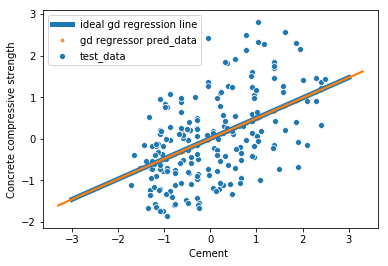

In [43]:
x1 = np.linspace(-3, 3, 5000)

sns.lineplot(x1, x1*MM + BB, label='ideal gd regression line', linewidth=5)
sns.regplot(x=Test.columns[0], y='y_pred_gd', 
                data=Test, label='gd regressor pred_data', marker='.')
sns.scatterplot(x=Test.columns[0], y='Concrete compressive strength', 
                data=Test, label='test_data')


In [32]:
# result
print(r2_score(y_test, y_pred_gd))

0.270274264711148


In [36]:
regResult.loc['gd'] = mean_squared_error(y_test, y_pred_gd), 0, r2_score(y_test, y_pred_gd), BB, MM

In [37]:
regResult.assign()

MSE         Cor          R2        bias                  weight
lm1   0.76095    0.241511    0.270385  0.00881143   [0.48908507004531826]
lm2   1.01867   0.0164834   0.0232731   0.0065061   [0.12816834041572597]
lm3   1.02085  0.00791413   0.0211892  0.00624392  [-0.08939418590123754]
lm4  0.908742   0.0713487    0.128679    0.008078  [-0.27137926316886857]
lm5  0.857007    0.121736    0.178283   0.0145947   [0.35621797153458684]
lm6   1.02961   0.0305339   0.0127896   0.0081849  [-0.17560925496399488]
lm7   1.04573   0.0352408 -0.00266844  0.00550458   [-0.1876630049284433]
lm8  0.913056    0.102996    0.124542  0.00134052    [0.3067393966701216]
gd   0.761065           0    0.270274  0.00875749                0.487732

## cf. Problem1 & Problem2
* 可看到每一項的都差不多(誤差在0.01的等級)
* 造成兩種方法數值誤差的可能性
    * 浮點運算誤差
    * 我們 Gradient Descenet 的 stopThreshold 設的比較小，可能提早跳出迴圈

In [38]:
regResult.loc[['lm1','gd']].assign()

MSE       Cor        R2        bias                 weight
lm1   0.76095  0.241511  0.270385  0.00881143  [0.48908507004531826]
gd   0.761065         0  0.270274  0.00875749               0.487732

### 這下面是 sklearn 的 Stochastic Gradient Descent Regressor
* 用全部 8 個 input attribute 下去 train，r2_score 可到 0.4

In [ ]:
import numpy as np
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X_train.iloc[:,0:8], y_train)


In [ ]:
y_pred_sgd = clf.predict(X_test)

In [ ]:
print('Coefficients (weight): ', clf.coef_)
print('\nIntercept (bias): ', clf.intercept_)
print('SGD Correlation: ', clf.score(X_train.iloc[:, 0:8], y_train))
print('SGD R2-score: ', r2_score(y_test, y_pred_sgd))


In [ ]:
x1 = np.linspace(-3, 3, 5000)

plt.plot(x1, x1, label='y=x')
for i, c in enumerate(clf.coef_):
    plt.plot(x1, c*x1 + clf.intercept_, label='regression'+str(i))
plt.legend()
plt.show()